In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
HS_data = pd.read_csv('C:/Users/matte/Downloads/Total Home Shots/HS_clean.csv')
HS_data

,Div,Day_Time,HomeTeam,AwayTeam,FTR,HTR,FTHG,FTAG,TGG,HTHG,HTAG,THGG,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,AvgC_greater_than_2.5,AvgC_less_than_2.5,HS
0,0.0,1.0,11.0,0.0,0.0,0.0,0,4,4,0,1,1,25,1,10,16,11,0,6,2,1,0,0,1.34,3.29,6
1,0.0,2.0,13.0,3.0,1.0,1.0,4,4,8,3,3,6,9,8,6,9,14,8,7,1,2,0,0,1.62,2.31,20
2,0.0,2.0,9.0,7.0,0.0,0.0,1,2,3,0,2,2,17,5,8,9,9,4,2,0,1,0,0,1.65,2.26,24
3,0.0,2.0,4.0,2.0,2.0,2.0,3,2,5,2,1,3,13,7,6,13,10,4,5,1,2,0,0,1.68,2.19,11
4,0.0,2.0,10.0,15.0,2.0,2.0,5,0,5,2,0,2,4,9,1,5,12,7,0,1,1,0,0,1.64,2.26,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,2.0,25.4,7.4,0.0,1.0,1,3,4,1,1,2,20,5,11,6,14,3,10,1,1,0,0,1.55,2.45,7
8951,4.0,1.0,9.4,15.4,1.0,2.0,1,1,2,1,0,1,13,5,11,15,17,7,3,3,3,0,0,1.35,3.14,13
8952,4.0,1.0,16.4,10.4,2.0,2.0,3,0,3,3,0,3,13,4,3,8,13,4,9,4,0,2,1,1.50,2.55,4
8953,4.0,1.0,21.4,27.4,0.0,1.0,3,4,7,2,2,4,18,8,11,3,7,5,4,0,2,0,0,1.32,3.34,12


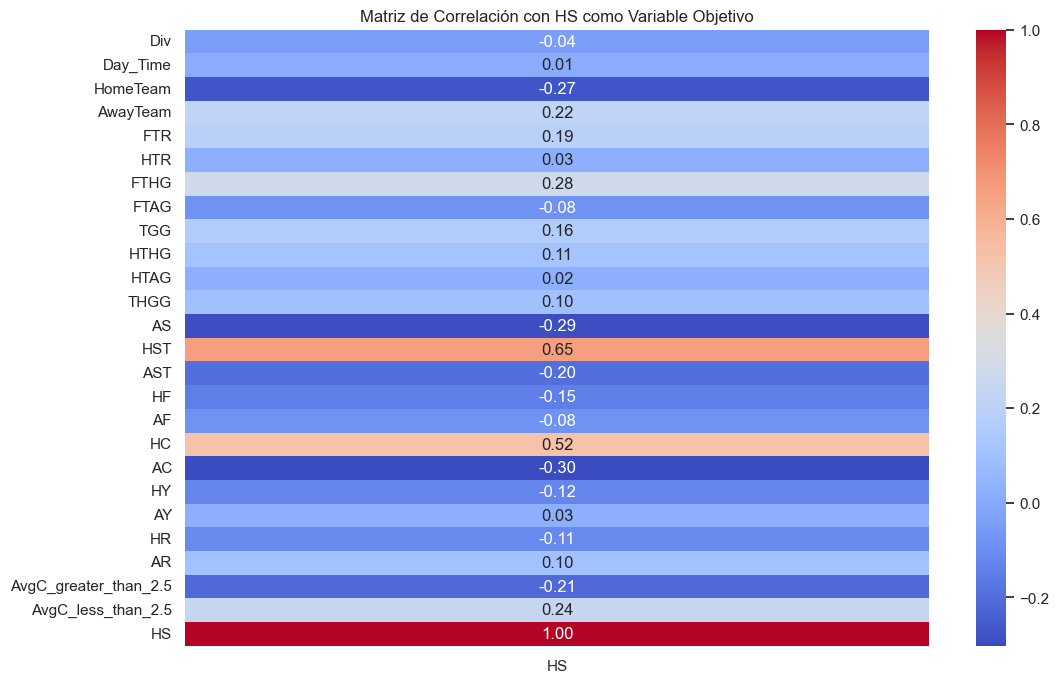

In [3]:
# Lista de variables objetivo
objective_variables = ['HS']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos
    final_data = HS_data.select_dtypes(include=['number'])

    # Crear la matriz de correlación para la variable objetivo actual
    correlation_matrix = final_data.corr()
    
    # Crear un mapa de calor para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix[[target_variable]], annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matriz de Correlación con {target_variable} como Variable Objetivo')
    plt.show()

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Lista de variables objetivo
objective_variables = ['HS']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos excluyendo la variable objetivo actual
    final_data = HS_data.select_dtypes(include=['number']).drop(columns=target_variable)
    
    # Agregar la variable objetivo al principio del DataFrame
    final_data = HS_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para HS:
                  Feature        VIF
0                      HS  17.750269
1                     Div   3.399003
2                Day_Time   6.392247
3                HomeTeam   4.216310
4                AwayTeam   3.906049
5                     FTR  11.358905
6                     HTR  16.962277
7                    FTHG        inf
8                    FTAG        inf
9                     TGG        inf
10                   HTHG        inf
11                   HTAG        inf
12                   THGG        inf
13                     AS  15.200605
14                    HST  11.179843
15                    AST   9.926705
16                     HF  13.024896
17                     AF  12.963623
18                     HC   6.332470
19                     AC   5.572715
20                     HY   3.890636
21                     AY   4.237433
22                     HR   1.185694
23                     AR   1.191684
24  AvgC_greater_than_2.5  28.075621
25     AvgC_less_than_2.5

In [5]:
HS_data.columns

Index(['Div', 'Day_Time', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'FTHG', 'FTAG',
       'TGG', 'HTHG', 'HTAG', 'THGG', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'AvgC_greater_than_2.5',
       'AvgC_less_than_2.5', 'HS'],
      dtype='object')

In [6]:
# Eliminar las columnas especificadas
columns_to_drop = ['TGG', 'THGG', 'HY', 'AY', 'HR', 'AR', 'AvgC_greater_than_2.5', 'AvgC_less_than_2.5']
HS_data = HS_data.drop(columns=columns_to_drop, errors='ignore')
HS_data

,Div,Day_Time,HomeTeam,AwayTeam,FTR,HTR,FTHG,FTAG,HTHG,HTAG,AS,HST,AST,HF,AF,HC,AC,HS
0,0.0,1.0,11.0,0.0,0.0,0.0,0,4,0,1,25,1,10,16,11,0,6,6
1,0.0,2.0,13.0,3.0,1.0,1.0,4,4,3,3,9,8,6,9,14,8,7,20
2,0.0,2.0,9.0,7.0,0.0,0.0,1,2,0,2,17,5,8,9,9,4,2,24
3,0.0,2.0,4.0,2.0,2.0,2.0,3,2,2,1,13,7,6,13,10,4,5,11
4,0.0,2.0,10.0,15.0,2.0,2.0,5,0,2,0,4,9,1,5,12,7,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,2.0,25.4,7.4,0.0,1.0,1,3,1,1,20,5,11,6,14,3,10,7
8951,4.0,1.0,9.4,15.4,1.0,2.0,1,1,1,0,13,5,11,15,17,7,3,13
8952,4.0,1.0,16.4,10.4,2.0,2.0,3,0,3,0,13,4,3,8,13,4,9,4
8953,4.0,1.0,21.4,27.4,0.0,1.0,3,4,2,2,18,8,11,3,7,5,4,12


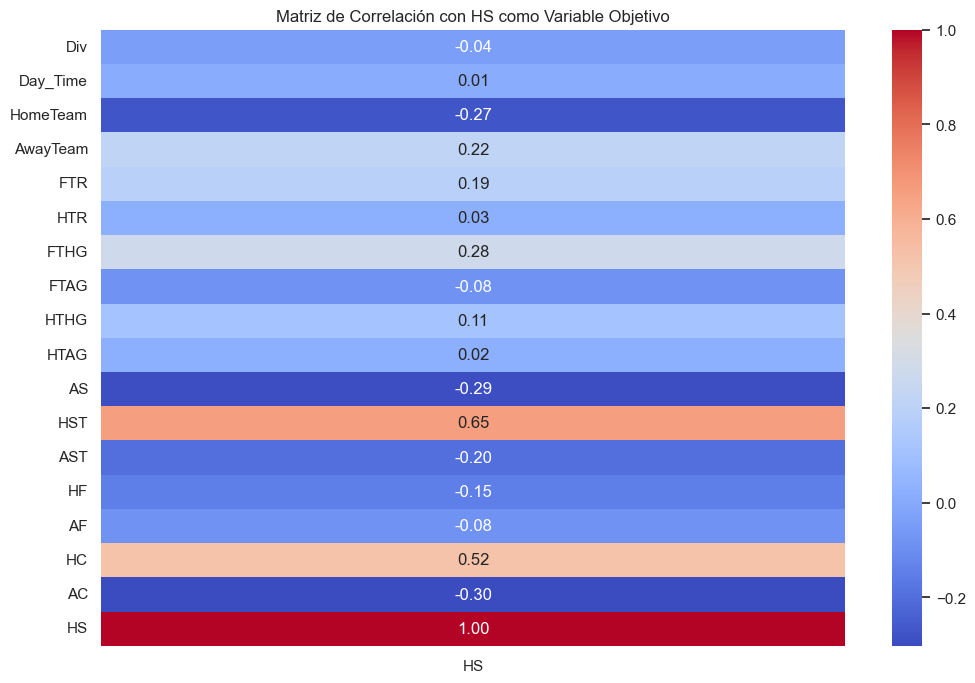

In [7]:
# Lista de variables objetivo
objective_variables = ['HS']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos
    final_data = HS_data.select_dtypes(include=['number'])

    # Crear la matriz de correlación para la variable objetivo actual
    correlation_matrix = final_data.corr()
    
    # Crear un mapa de calor para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix[[target_variable]], annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matriz de Correlación con {target_variable} como Variable Objetivo')
    plt.show()

In [8]:
# Lista de variables objetivo
objective_variables = ['HS']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos excluyendo la variable objetivo actual
    final_data = HS_data.select_dtypes(include=['number']).drop(columns=target_variable)
    
    # Agregar la variable objetivo al principio del DataFrame
    final_data = HS_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para HS:
     Feature        VIF
0         HS  15.898707
1        Div   3.304120
2   Day_Time   5.964623
3   HomeTeam   3.787803
4   AwayTeam   3.811516
5        FTR  11.073275
6        HTR  15.801525
7       FTHG  10.055648
8       FTAG   8.640903
9       HTHG   7.094143
10      HTAG   6.315657
11        AS  14.377382
12       HST  11.024699
13       AST   9.861292
14        HF   9.627924
15        AF   9.561152
16        HC   6.112173
17        AC   5.467444


In [9]:
# Eliminar las columnas especificadas
columns_to_drop = ['Div', 'Day_Time', 'HTR', 'AS']
HS_data = HS_data.drop(columns=columns_to_drop, errors='ignore')
HS_data

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG,HST,AST,HF,AF,HC,AC,HS
0,11.0,0.0,0.0,0,4,0,1,1,10,16,11,0,6,6
1,13.0,3.0,1.0,4,4,3,3,8,6,9,14,8,7,20
2,9.0,7.0,0.0,1,2,0,2,5,8,9,9,4,2,24
3,4.0,2.0,2.0,3,2,2,1,7,6,13,10,4,5,11
4,10.0,15.0,2.0,5,0,2,0,9,1,5,12,7,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,25.4,7.4,0.0,1,3,1,1,5,11,6,14,3,10,7
8951,9.4,15.4,1.0,1,1,1,0,5,11,15,17,7,3,13
8952,16.4,10.4,2.0,3,0,3,0,4,3,8,13,4,9,4
8953,21.4,27.4,0.0,3,4,2,2,8,11,3,7,5,4,12


In [10]:
# Lista de variables objetivo
objective_variables = ['HS']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos excluyendo la variable objetivo actual
    final_data = HS_data.select_dtypes(include=['number']).drop(columns=target_variable)
    
    # Agregar la variable objetivo al principio del DataFrame
    final_data = HS_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para HS:
     Feature        VIF
0         HS  15.460919
1   HomeTeam   3.678036
2   AwayTeam   3.747068
3        FTR   9.245117
4       FTHG   9.503940
5       FTAG   7.958750
6       HTHG   3.333876
7       HTAG   3.057966
8        HST  10.978418
9        AST   6.550939
10        HF   9.139774
11        AF   9.201300
12        HC   6.015829
13        AC   4.359032


In [11]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = HS_data.drop(columns=['HS'])  # Características excluyendo la variable objetivo
y = HS_data['HS']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 11.835916694584032
R^2 Score: 0.5636088691600579


In [14]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15]
}

# Inicializar el GridSearchCV con el modelo Random Forest
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Número de divisiones para la validación cruzada
                           scoring='r2',  # Métrica de evaluación
                           verbose=1,
                           n_jobs=-1)  # Utilizar todos los núcleos de CPU disponibles

# Entrenar GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo entrenado
best_rf_model = grid_search.best_estimator_

# Hacer predicciones y evaluar el modelo ajustado
y_pred_grid = best_rf_model.predict(X_test)
r2_grid = r2_score(y_test, y_pred_grid)
print(f"R^2 Score después de ajuste de hiperparámetros: {r2_grid}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Mejores hiperparámetros encontrados:
{'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 200}
R^2 Score después de ajuste de hiperparámetros: 0.5716645541069746


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo con los mejores hiperparámetros
rf = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=15)

# Entrenar el modelo con los datos limpios TGG_data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=15, n_estimators=300)

In [16]:
importances = rf.feature_importances_

In [17]:
feature_names = list(X_train.columns)  # Obtener nombres de características si X_train es un DataFrame

# Crear un DataFrame de importancias de características
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar las características por importancia descendente
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)

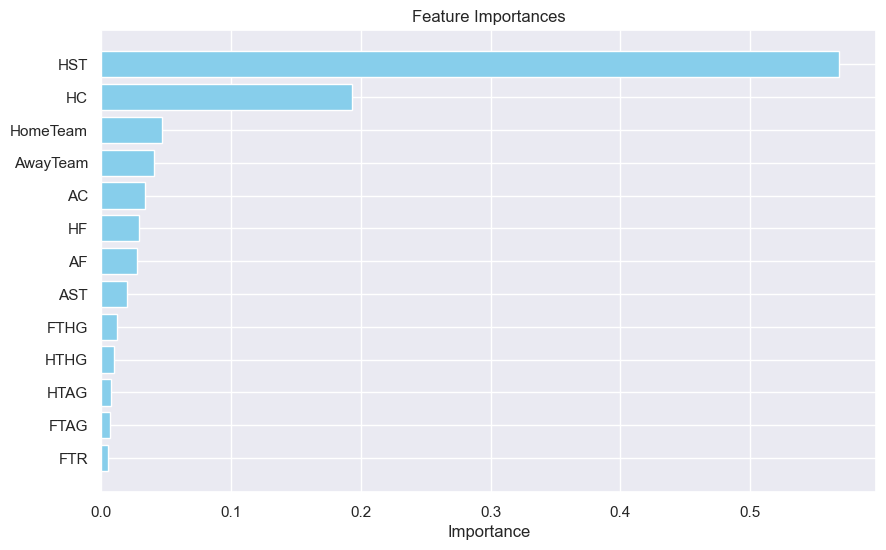

In [18]:
# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

In [19]:
# Definir la variable objetivo específica
target_variable = 'HS'

# Seleccionar variables numéricas excluyendo la variable objetivo
X = HS_data.drop(columns=[target_variable])
y = HS_data[target_variable]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obtener la importancia de las variables
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar importancia de las variables para 'TGG' en el modelo de Random Forest
print(f"\nImportancia de las variables para '{target_variable}' en el modelo de Random Forest:")
for i, idx in enumerate(indices):
    print(f"{i+1}. {X.columns[idx]}: {importances[idx]}")


Importancia de las variables para 'HS' en el modelo de Random Forest:
1. HST: 0.4135698458730141
2. HC: 0.15355570752166964
3. HomeTeam: 0.07887594245203447
4. AwayTeam: 0.07595651012333947
5. AF: 0.05364877643598928
6. HF: 0.05225601424471864
7. AC: 0.04794574883712032
8. AST: 0.040134190816755705
9. FTHG: 0.02272688154700713
10. FTAG: 0.01847542716002088
11. HTHG: 0.016765926949330007
12. HTAG: 0.015165153704957388
13. FTR: 0.010923874334042854


In [39]:
HS_data

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG,HST,AST,HF,AF,HC,AC,HS
0,11.0,0.0,0.0,0,4,0,1,1,10,16,11,0,6,6
1,13.0,3.0,1.0,4,4,3,3,8,6,9,14,8,7,20
2,9.0,7.0,0.0,1,2,0,2,5,8,9,9,4,2,24
3,4.0,2.0,2.0,3,2,2,1,7,6,13,10,4,5,11
4,10.0,15.0,2.0,5,0,2,0,9,1,5,12,7,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,25.4,7.4,0.0,1,3,1,1,5,11,6,14,3,10,7
8951,9.4,15.4,1.0,1,1,1,0,5,11,15,17,7,3,13
8952,16.4,10.4,2.0,3,0,3,0,4,3,8,13,4,9,4
8953,21.4,27.4,0.0,3,4,2,2,8,11,3,7,5,4,12


In [43]:
# Ajusta new_data para que coincida con las columnas de entrenamiento
new_data1 = pd.DataFrame({
    'HomeTeam': [1.10],  
    'AwayTeam': [0.10],
    'FTR': [2.0],
    'FTHG': [5],
    'FTAG': [1],
    'HTHG': [2],
    'HTAG': [0],  
    'HST': [8],
    'AST': [4],
    'HF': [17],
    'AF': [14],
    'HC': [4],
    'AC': [2],
})

# Hacer la predicción utilizando el modelo entrenado
predicted_HS = rf_model.predict(new_data1)
print(f"Predicción de HS para el nuevo partido: {predicted_HS}")

Predicción de HS para el nuevo partido: [15.8]
